# D08 | Orientation の可視化

## Data Source

- 前処理済みのQuaternion

## 可視化項目

- 値のレンジ
- 各軸の値の変化
- 座標系

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set("notebook", "whitegrid")

/Users/yoshimuranaoya/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## [1] データの読み込み

In [2]:
VERSION = "v2-0-0"

df = pd.read_csv(f"./data/U0002_S0100_cleaned_{VERSION}.csv")
print(df.shape)

(49720, 258)


In [3]:
df.head()

,timestamp,body_index,J00_P0,J00_P1,J00_P2,J00_O0,J00_O1,J00_O2,J00_O3,J00_CONF,...,J30_O3,J30_CONF,J31_P0,J31_P1,J31_P2,J31_O0,J31_O1,J31_O2,J31_O3,J31_CONF
0,2021-10-22 02:15:46.000406016,0,0.0000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,2,...,0.000000,2,0.000,0.000,0.0,0.00000,0.000000,0.000000,0.000000,2
1,2021-10-22 02:15:46.066406016,0,0.0000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,2,...,0.000000,2,0.000,0.000,0.0,0.00000,0.000000,0.000000,0.000000,2
2,2021-10-22 02:15:46.132406016,0,0.0000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,2,...,0.000000,2,0.000,0.000,0.0,0.00000,0.000000,0.000000,0.000000,2
3,2021-10-22 02:15:46.198406016,0,0.0000,0.000,0.00,0.000000,0.000000,0.000000,0.000000,2,...,0.000000,2,0.000,0.000,0.0,0.00000,0.000000,0.000000,0.000000,2
4,2021-10-22 02:15:46.264406016,0,47.0129,351.886,2230.96,0.550014,-0.434476,0.473526,-0.532536,2,...,0.193177,2,-15.251,-198.904,2152.4,0.65355,-0.291262,0.606166,-0.380356,2


In [6]:
list(df.columns)

['timestamp',
 'body_index',
 'J00_P0',
 'J00_P1',
 'J00_P2',
 'J00_O0',
 'J00_O1',
 'J00_O2',
 'J00_O3',
 'J00_CONF',
 'J01_P0',
 'J01_P1',
 'J01_P2',
 'J01_O0',
 'J01_O1',
 'J01_O2',
 'J01_O3',
 'J01_CONF',
 'J02_P0',
 'J02_P1',
 'J02_P2',
 'J02_O0',
 'J02_O1',
 'J02_O2',
 'J02_O3',
 'J02_CONF',
 'J03_P0',
 'J03_P1',
 'J03_P2',
 'J03_O0',
 'J03_O1',
 'J03_O2',
 'J03_O3',
 'J03_CONF',
 'J04_P0',
 'J04_P1',
 'J04_P2',
 'J04_O0',
 'J04_O1',
 'J04_O2',
 'J04_O3',
 'J04_CONF',
 'J05_P0',
 'J05_P1',
 'J05_P2',
 'J05_O0',
 'J05_O1',
 'J05_O2',
 'J05_O3',
 'J05_CONF',
 'J06_P0',
 'J06_P1',
 'J06_P2',
 'J06_O0',
 'J06_O1',
 'J06_O2',
 'J06_O3',
 'J06_CONF',
 'J07_P0',
 'J07_P1',
 'J07_P2',
 'J07_O0',
 'J07_O1',
 'J07_O2',
 'J07_O3',
 'J07_CONF',
 'J08_P0',
 'J08_P1',
 'J08_P2',
 'J08_O0',
 'J08_O1',
 'J08_O2',
 'J08_O3',
 'J08_CONF',
 'J09_P0',
 'J09_P1',
 'J09_P2',
 'J09_O0',
 'J09_O1',
 'J09_O2',
 'J09_O3',
 'J09_CONF',
 'J10_P0',
 'J10_P1',
 'J10_P2',
 'J10_O0',
 'J10_O1',
 'J10_O2',
 'J10

## [2] 角度のPlot

### Head (ID=10)

[0.467344 0.467344 0.467344 ... 0.302608 0.190905 0.190905]
[ 0.142918  0.142918  0.142918 ... -0.131196  0.407772  0.415524]
[0.150505 0.150505 0.150505 ... 0.431714 0.796879 0.844915]
[ 0.859368  0.859368  0.859368 ... -0.23785  -0.18379  -0.18379 ]


/var/folders/dm/z_k23pbx6y78kywxjbsfpm8c0000gn/T/ipykernel_3510/1697951157.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


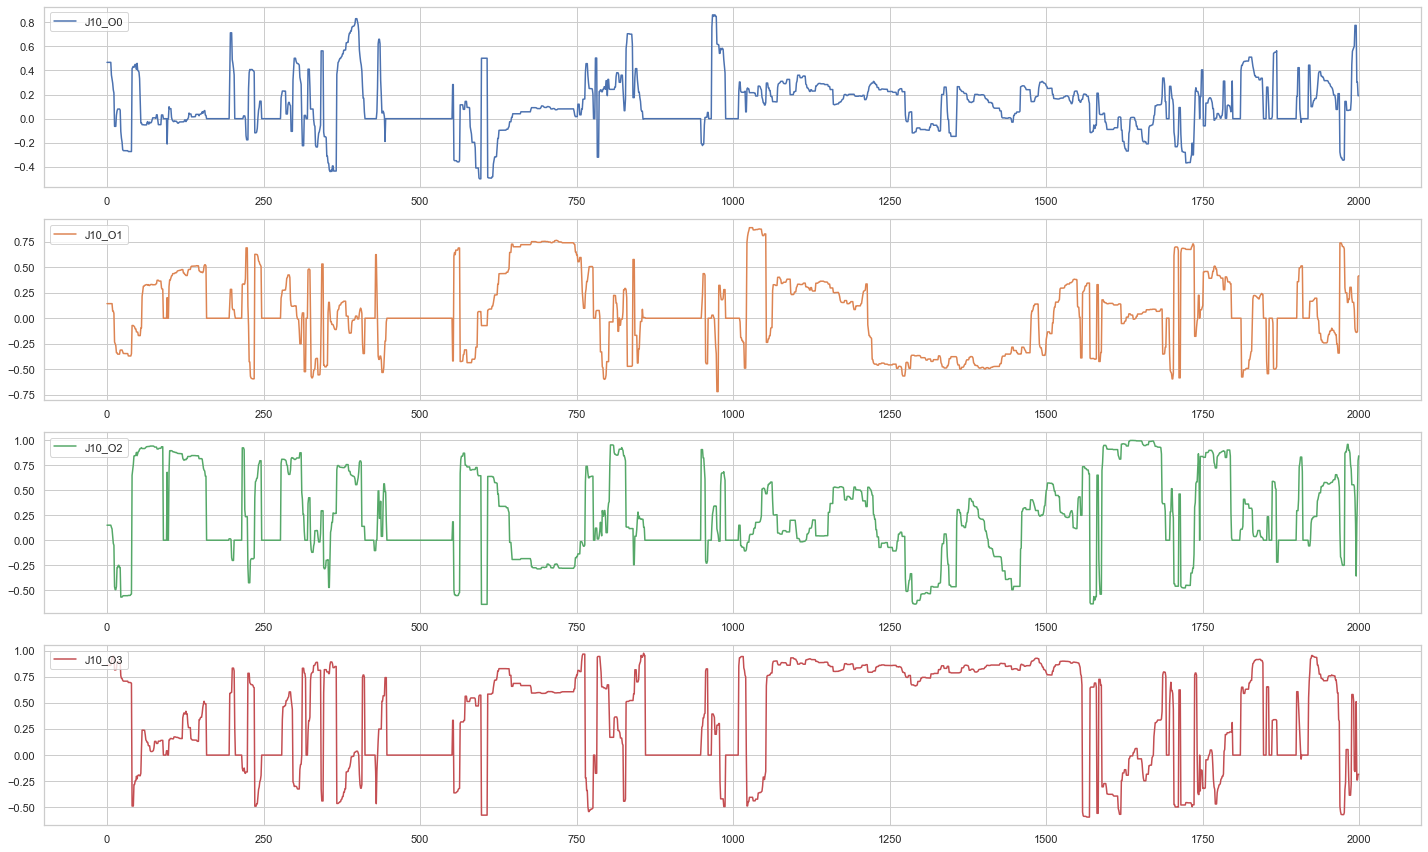

In [14]:
joint_id = 10
loc = slice(10000, 2000)

fig, ax = plt.subplots(4, 1, figsize=(20, 3*4))

for ch in range(4):
    key = f"J{joint_id:0=2}_O{ch}"
    y = df[key].values[10000:12000]
    print(y)
    
    ax0 = ax[ch]
    ax0.plot(y, label=key, color=f"C{ch}")
    
    ax0.legend(loc="upper left")
    
fig.tight_layout()
fig.show()

#### ノルムのプロット

- 1になるはず
- ノルムの計算が間違っているように思われる． (どうやって計算するのか？)
    - 参考: [注意点 2: 回転クォータニオンのノルムは 1](https://qiita.com/drken/items/0639cf34cce14e8d58a5#%E6%B3%A8%E6%84%8F%E7%82%B9-2-%E5%9B%9E%E8%BB%A2%E3%82%AF%E3%82%A9%E3%83%BC%E3%82%BF%E3%83%8B%E3%82%AA%E3%83%B3%E3%81%AE%E3%83%8E%E3%83%AB%E3%83%A0%E3%81%AF-1)


(2000, 4)
(2000,)


/var/folders/dm/z_k23pbx6y78kywxjbsfpm8c0000gn/T/ipykernel_3510/958148479.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


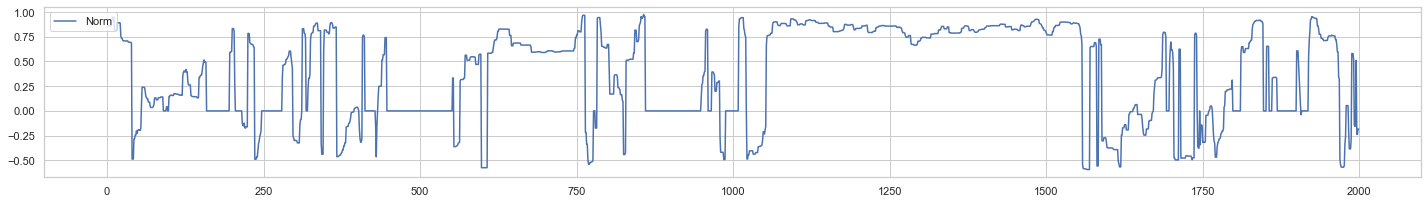

In [15]:
joint_id = 10


keys = [f"J{joint_id:0=2}_O{ch}" for ch in range(4)]
x = df[keys].values[10000:12000]
print(x.shape)    
x = np.sqrt((x**2).sum(axis=1))
print(x.shape)    


fig, ax0 = plt.subplots(1, 1, figsize=(20, 3))
ax0.plot(y, label="Norm", color=f"C0")
ax0.legend(loc="upper left")

fig.tight_layout()
fig.show()